In [1]:


import pandas as pd

df = pd.read_csv(r"C:\Users\lenovo\Downloads\City-Traffic-and-Accident-Pattern-Analysis-main\traffic_accident_analysis\traffic_accidents.csv")
print(df.head())



   Accident_ID       Date    City Weather Vehicles_Involved  Casualties  \
0          101  1/15/2023   Delhi   Clear             truck           1   
1          102  2/10/2023  Mumbai   Rainy               bus           3   
2          103   3/5/2023  Bhopal     Fog              bike           0   
3          104  3/25/2023  Indore   Clear               bus           0   
4          105  4/12/2023    Pune   Clear             truck           2   

  Severity cause_of_accident   Road_Type road_condition  
0      Low      overspeeding     highway           dry   
1     High           alcohol   city road        damaged  
2   Medium      overspeeding  rural road            Wet  
3      Low          whether      highway           dry   
4     High           alcohol   city road        damaged  


In [2]:
df.describe()

,Accident_ID,Casualties
count,8.00000,8.000000
mean,104.50000,1.250000
std,2.44949,1.035098
min,101.00000,0.000000
25%,102.75000,0.750000
50%,104.50000,1.000000
75%,106.25000,2.000000
max,108.00000,3.000000


# starter Code (01_data_cleaning.ipynb)

In [3]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\lenovo\Downloads\City-Traffic-and-Accident-Pattern-Analysis-main\traffic_accident_analysis\traffic_accidents.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.dropna(inplace=True)                  # Drop missing values (basic cleaning)

# Step 4: Feature Engineering
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.day_name()

print(df[['Date', 'Month', 'Day_of_Week']].head())


Dataset Shape: (8, 10)
   Accident_ID       Date    City Weather Vehicles_Involved  Casualties  \
0          101  1/15/2023   Delhi   Clear             truck           1   
1          102  2/10/2023  Mumbai   Rainy               bus           3   
2          103   3/5/2023  Bhopal     Fog              bike           0   
3          104  3/25/2023  Indore   Clear               bus           0   
4          105  4/12/2023    Pune   Clear             truck           2   

  Severity cause_of_accident   Road_Type road_condition  
0      Low      overspeeding     highway           dry   
1     High           alcohol   city road        damaged  
2   Medium      overspeeding  rural road            Wet  
3      Low          whether      highway           dry   
4     High           alcohol   city road        damaged  
        Date  Month Day_of_Week
0 2023-01-15      1      Sunday
1 2023-02-10      2      Friday
2 2023-03-05      3      Sunday
3 2023-03-25      3    Saturday
4 2023-04-12      

# Starter Code for EDA (02_eda_visualization.ipynb)

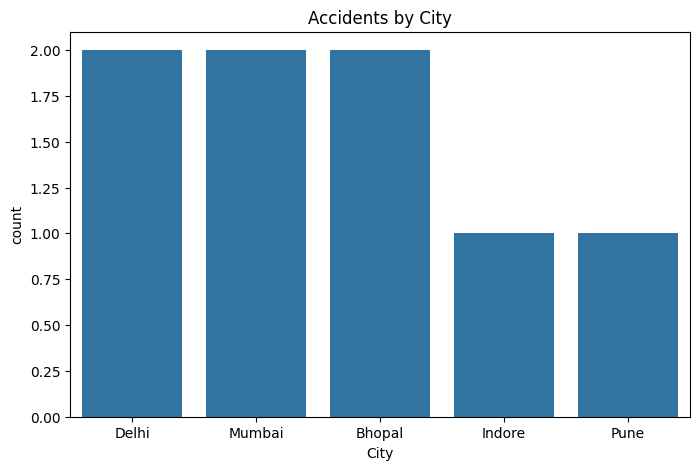

In [4]:
# City-wise accident count
plt.figure(figsize=(8,5))
sns.countplot(x="City", data=df)
plt.title("Accidents by City")
plt.show()

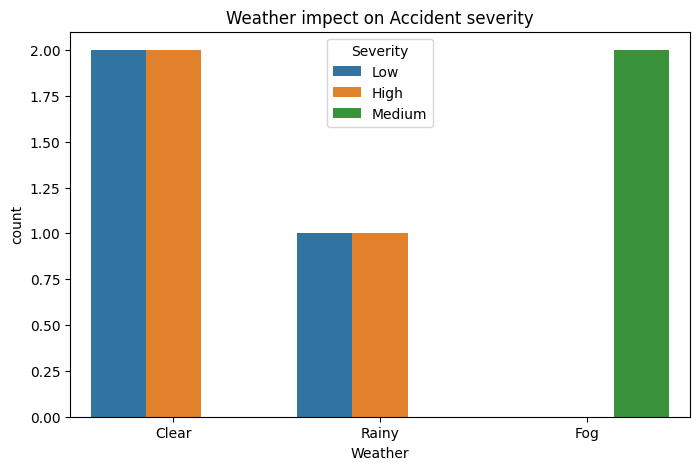

In [5]:
# whether vs severity
plt.figure(figsize=(8,5))
sns.countplot(x="Weather", hue="Severity", data=df)
plt.title("Weather impect on Accident severity")
plt.show()


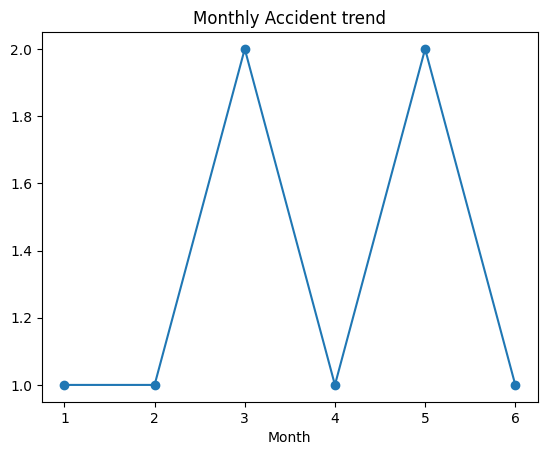

In [6]:
#Time trend
df.groupby("Month")["Accident_ID"].count().plot(kind="line", marker="o")
plt.title("Monthly Accident trend")
plt.show()

In [7]:
print(df.columns)


Index(['Accident_ID', 'Date', 'City', 'Weather', 'Vehicles_Involved',
       'Casualties', 'Severity', 'cause_of_accident', 'Road_Type',
       'road_condition', 'Month', 'Day_of_Week'],
      dtype='object')


# Starter Code for ML (03_ML_Model.ipynb)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Data Load
df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")

# 2. Target column (Severity)
y = df["Severity"]

# 3. Features (baaki sab, except Severity)
X = df.drop(["Severity", "Accident_ID", "Date"], axis=1)  
# Accident_ID aur Date analysis me useful nahi hote, isliye hata diye

# 4. Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 5. Encode target (Low=0, Medium=1, High=2)
le = LabelEncoder()
y = le.fit_transform(y)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Features shape:", X_train.shape)
print("✅ Target shape:", y_train.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lenovo\\Downloads\\traffic_accidents.csv'

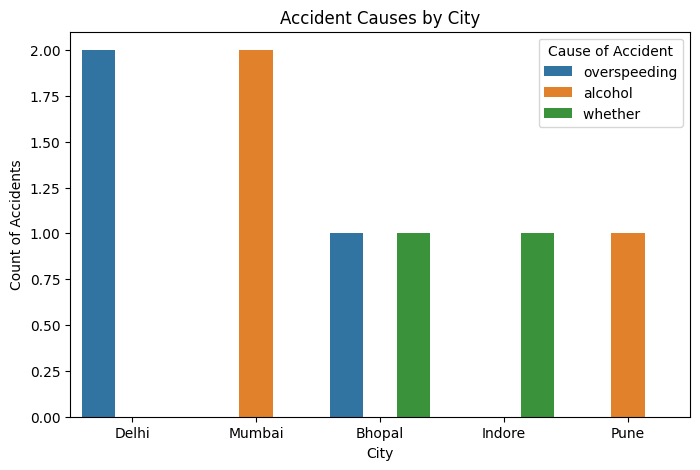

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="City", hue="cause_of_accident", data=df)

plt.title("Accident Causes by City")
plt.xlabel("City")
plt.ylabel("Count of Accidents")
plt.legend(title="Cause of Accident")
plt.show()


In [ ]:
print (df.columns)

Index(['Accident_ID', 'Date', 'City', 'Weather', 'Vehicles_Involved',
       'Casualties', 'Severity', 'cause_of_accident', 'Road_Type',
       'road_condition'],
      dtype='object')


In [ ]:
df["Vehicles_Involved"]


0    truck
1      bus
2     bike
3      bus
4      car
5    truck
6      car
7    truck
Name: Vehicles_Involved, dtype: object

#Bar chart

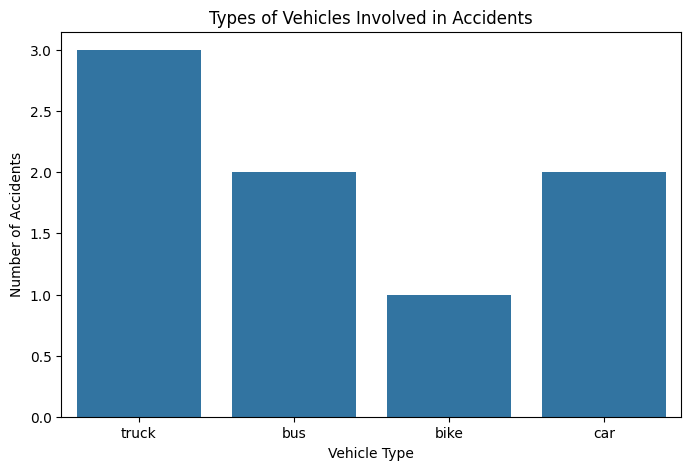

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="Vehicles_Involved", data=df)

plt.title("Types of Vehicles Involved in Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.show()


# pie chart

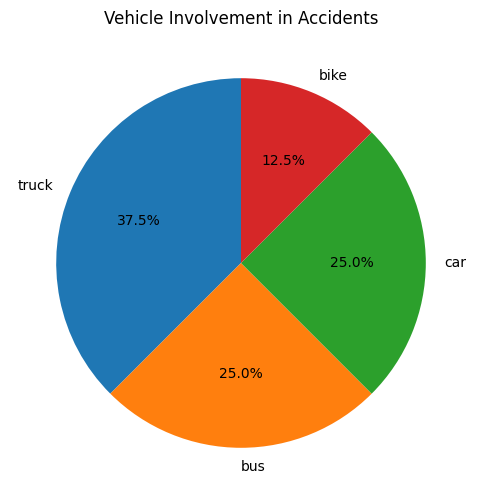

In [ ]:
df["Vehicles_Involved"].value_counts().plot(
    kind="pie", 
    autopct="%1.1f%%", 
    figsize=(6,6), 
    startangle=90
)
plt.title("Vehicle Involvement in Accidents")
plt.ylabel("")
plt.show()


# pie chart of cause of accident

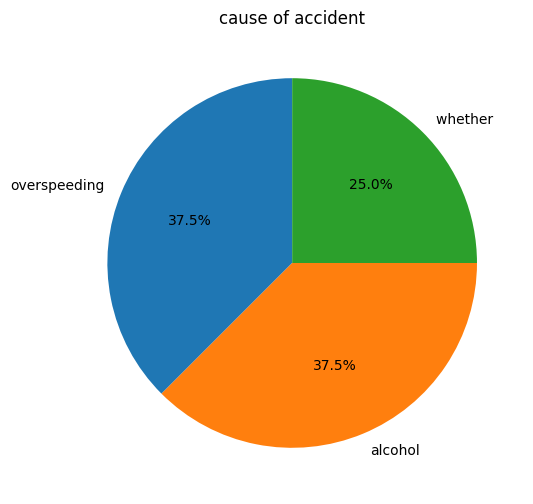

In [ ]:
df["cause_of_accident"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    startangle=90
)
plt.title("cause of accident")
plt.ylabel("")
plt.show()

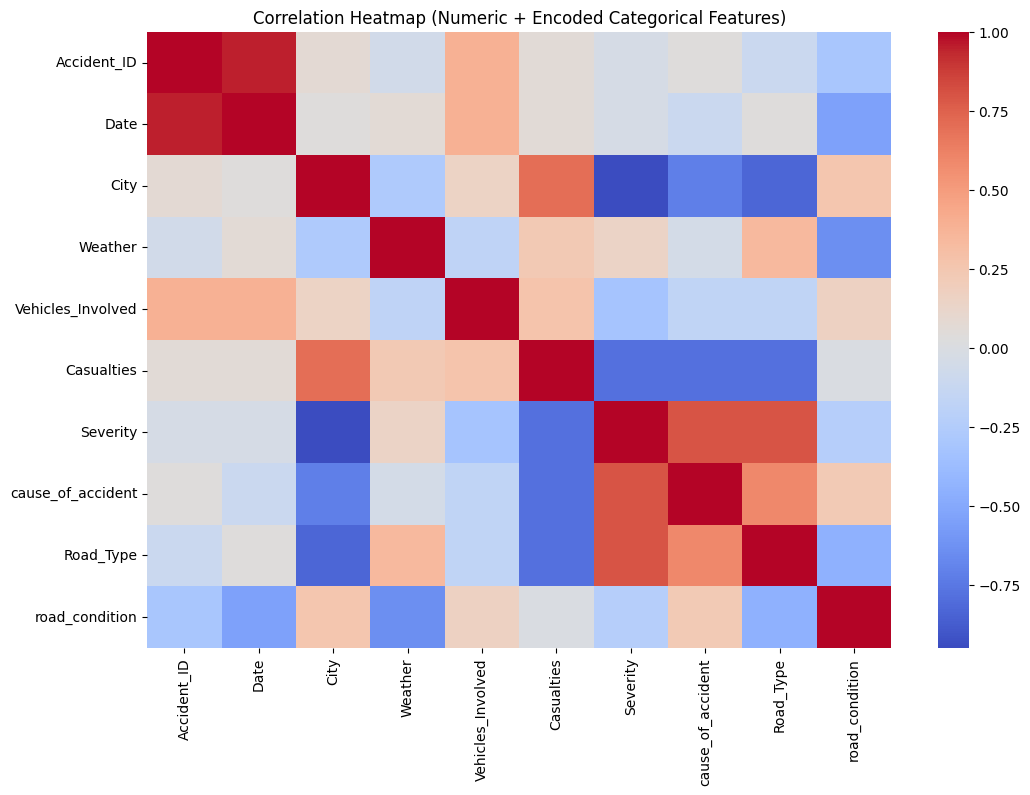

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. Copy dataframe (original safe rahega)
df_copy = df.copy()

# 2. Categorical columns identify karo
cat_cols = df_copy.select_dtypes(include=['object']).columns

# 3. Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))

# 4. Sirf numeric (ab encoded bhi numeric hain)
numeric_df = df_copy.select_dtypes(include=['number'])

# 5. Correlation matrix
corr = numeric_df.corr()

# 6. Heatmap plot
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)  # annot=False rakha taaki readability rahe
plt.title("Correlation Heatmap (Numeric + Encoded Categorical Features)")
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv(r"C:\Users\lenovo\Downloads\traffic_accidents.csv")
print(df.head())


   Accident_ID       Date    City Weather Vehicles_Involved  Casualties  \
0          101  1/15/2023   Delhi   Clear             truck           1   
1          102  2/10/2023  Mumbai   Rainy               bus           3   
2          103   3/5/2023  Bhopal     Fog              bike           0   
3          104  3/25/2023  Indore   Clear               bus           0   
4          105  4/12/2023    Pune   Clear               car           2   

  Severity cause_of_accident   Road_Type road_condition  
0      Low      overspeeding     highway           dry   
1     High           alcohol   city road        damaged  
2   Medium      overspeeding  rural road            Wet  
3      Low          whether      highway           dry   
4     High           alcohol   city road        damaged  


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Accident_ID        8 non-null      int64 
 1   Date               8 non-null      object
 2   City               8 non-null      object
 3   Weather            8 non-null      object
 4   Vehicles_Involved  8 non-null      object
 5   Casualties         8 non-null      int64 
 6   Severity           8 non-null      object
 7   cause_of_accident  8 non-null      object
 8   Road_Type          8 non-null      object
 9   road_condition     8 non-null      object
dtypes: int64(2), object(8)
memory usage: 772.0+ bytes


Accident_ID          0
Date                 0
City                 0
Weather              0
Vehicles_Involved    0
Casualties           0
Severity             0
cause_of_accident    0
Road_Type            0
road_condition       0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
for col in ['City','Weather','Vehicles_Involved','Severity','cause_of_accident','Road_Type','road_condition']:
    print(f"\n{col} value counts:\n", df[col].value_counts())




City value counts:
 City
Delhi     2
Mumbai    2
Bhopal    2
Indore    1
Pune      1
Name: count, dtype: int64

Weather value counts:
 Weather
Clear    4
Rainy    2
Fog      2
Name: count, dtype: int64

Vehicles_Involved value counts:
 Vehicles_Involved
truck    3
bus      2
car      2
bike     1
Name: count, dtype: int64

Severity value counts:
 Severity
Low       3
High      3
Medium    2
Name: count, dtype: int64

cause_of_accident value counts:
 cause_of_accident
overspeeding    3
alcohol         3
whether         2
Name: count, dtype: int64

Road_Type value counts:
 Road_Type
highway       3
city road     3
rural road    2
Name: count, dtype: int64

road_condition value counts:
 road_condition
damaged    4
dry        2
Wet        2
Name: count, dtype: int64


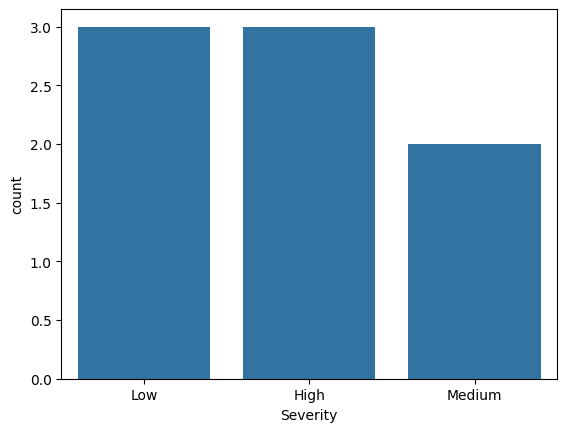

In [ ]:
sns.countplot(x="Severity", data=df)
plt.show()


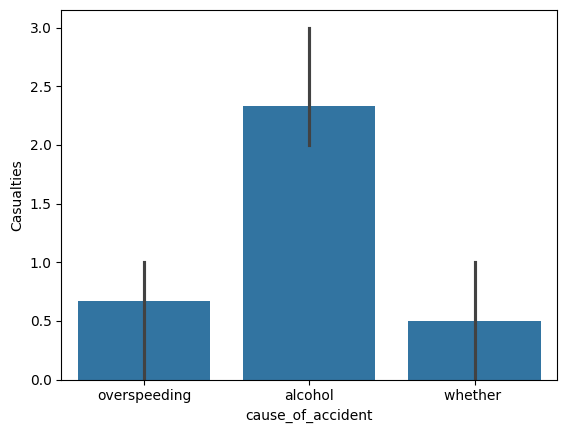

In [ ]:
sns.barplot(x="cause_of_accident", y="Casualties", data=df)
plt.show()


In [ ]:
print(df['Casualties'].describe())


count    8.000000
mean     1.250000
std      1.035098
min      0.000000
25%      0.750000
50%      1.000000
75%      2.000000
max      3.000000
Name: Casualties, dtype: float64


In [ ]:
#import pandas as pd

#df = pd.read_csv(r"C:\Users\lenovo\Downloads\City-Traffic-and-Accident-Pattern-Analysis-main\traffic_accident_analysis\traffic_accidents.csv")
#df.head()


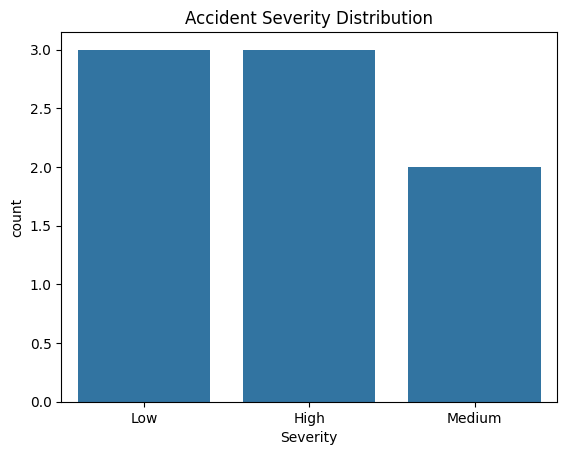

In [ ]:
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')
plt.show()


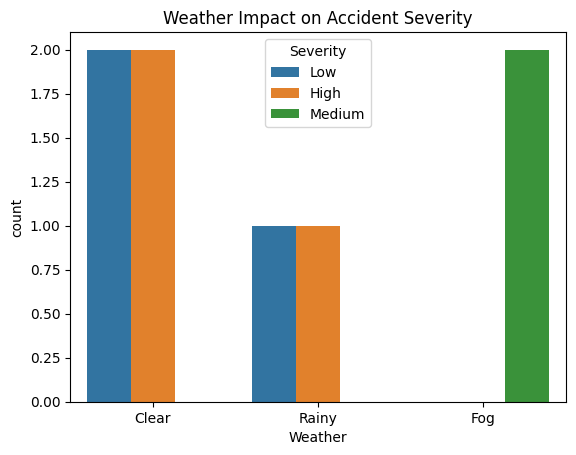

In [ ]:
sns.countplot(x='Weather', hue='Severity', data=df)
plt.title('Weather Impact on Accident Severity')
plt.show()


In [ ]:
df['cause_of_accident'].value_counts()


cause_of_accident
overspeeding    3
alcohol         3
whether         2
Name: count, dtype: int64

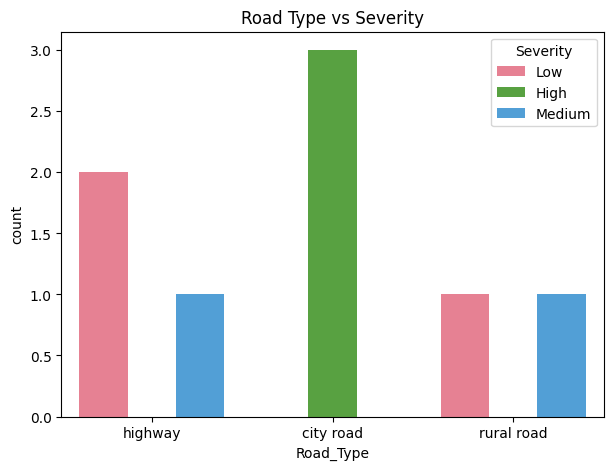

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="Road_Type", hue="Severity", data=df, palette="husl")
plt.title("Road Type vs Severity")
plt.show()

